In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq

from typing import TypedDict
from langgraph.checkpoint.memory import InMemorySaver

from dotenv import load_dotenv

In [2]:
load_dotenv()

llm = ChatGroq(model='llama-3.3-70b-versatile')

### Create State

In [3]:
class JokeState(TypedDict):
    topic:str
    joke:str
    explaination:str

### Function for workflow

In [4]:
def generate_joke(state:JokeState):
    prompt = f"generate a joke on the given topic: {state['topic']}"
    response = llm.invoke(prompt).content
    return {'joke': response}

def generate_explaination(state:JokeState):
    prompt = f"write an explaination for this joke - {state['joke']}"
    response = llm.invoke(prompt).content
    return {'explaination':response}

### create workflow

In [5]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke',generate_joke)
graph.add_node('generate_explaination',generate_explaination)

graph.add_edge(START,'generate_joke')
graph.add_edge('generate_joke','generate_explaination')
graph.add_edge('generate_explaination',END)

checkpointer = InMemorySaver()
workflow = graph.compile(checkpointer=checkpointer)

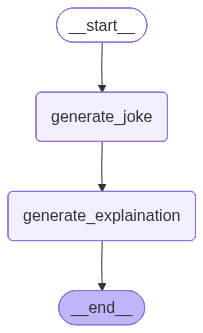

In [6]:
workflow

### Trigger workflow with persistence

#### First user

In [7]:
config1 = {'configurable':{'thread_id':1}}
workflow.invoke({'topic':'pizza'},config=config1)

{'topic': 'pizza',
 'joke': 'Why was the pizza in a bad mood?\n\nBecause it was feeling a little crusty.',
 'explaination': 'A tasty joke. Here\'s a breakdown of why it\'s funny:\n\nThe joke is a play on words, using a common phrase "feeling a little crusty" in a literal and figurative sense. In everyday language, when someone says they\'re "feeling crusty," it\'s an idiomatic expression meaning they\'re feeling irritable, grumpy, or a bit off. It\'s often used to describe someone who\'s being short-tempered or unpleasant.\n\nIn this joke, the phrase is applied to a pizza, which has a crust as one of its main components. So, when the joke says the pizza is "feeling a little crusty," it\'s making a pun on the word "crusty." The pizza is literally a food item with a crust, but the phrase is also being used to describe its emotional state (being in a bad mood).\n\nThe humor comes from the unexpected twist on the usual meaning of the phrase, and the clever connection between the pizza\'s c

In [8]:
workflow.get_state(config=config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why was the pizza in a bad mood?\n\nBecause it was feeling a little crusty.', 'explaination': 'A tasty joke. Here\'s a breakdown of why it\'s funny:\n\nThe joke is a play on words, using a common phrase "feeling a little crusty" in a literal and figurative sense. In everyday language, when someone says they\'re "feeling crusty," it\'s an idiomatic expression meaning they\'re feeling irritable, grumpy, or a bit off. It\'s often used to describe someone who\'s being short-tempered or unpleasant.\n\nIn this joke, the phrase is applied to a pizza, which has a crust as one of its main components. So, when the joke says the pizza is "feeling a little crusty," it\'s making a pun on the word "crusty." The pizza is literally a food item with a crust, but the phrase is also being used to describe its emotional state (being in a bad mood).\n\nThe humor comes from the unexpected twist on the usual meaning of the phrase, and the clever connection bet

In [9]:
list(workflow.get_state_history(config=config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why was the pizza in a bad mood?\n\nBecause it was feeling a little crusty.', 'explaination': 'A tasty joke. Here\'s a breakdown of why it\'s funny:\n\nThe joke is a play on words, using a common phrase "feeling a little crusty" in a literal and figurative sense. In everyday language, when someone says they\'re "feeling crusty," it\'s an idiomatic expression meaning they\'re feeling irritable, grumpy, or a bit off. It\'s often used to describe someone who\'s being short-tempered or unpleasant.\n\nIn this joke, the phrase is applied to a pizza, which has a crust as one of its main components. So, when the joke says the pizza is "feeling a little crusty," it\'s making a pun on the word "crusty." The pizza is literally a food item with a crust, but the phrase is also being used to describe its emotional state (being in a bad mood).\n\nThe humor comes from the unexpected twist on the usual meaning of the phrase, and the clever connection be

#### Second user

In [10]:
config2 = {'configurable':{'thread_id':2}}
workflow.invoke({'topic':'pasta'},config=config2)

{'topic': 'pasta',
 'joke': 'Why did the spaghetti refuse to get married?\n\nBecause it was afraid of getting tangled up in a relationship.',
 'explaination': 'A clever play on words. This joke is a form of wordplay known as a pun. Here\'s how it works:\n\nThe joke starts by setting up a familiar scenario: a potential marriage. But instead of using a person as the subject, it uses spaghetti, a type of long, thin, and flexible pasta.\n\nThe punchline "it was afraid of getting tangled up in a relationship" is where the wordplay happens. The phrase "tangled up" has a double meaning here:\n\n1. In a relationship, "tangled up" can mean becoming deeply involved or entangled in a complicated situation, which can be overwhelming or difficult to navigate.\n2. Spaghetti, being a long and thin pasta, can literally become tangled up when it\'s not properly cooked or stored. The strands can twist and turn around each other, creating a messy and knotted situation.\n\nThe joke relies on this double m

In [11]:
workflow.get_state(config=config2)

StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the spaghetti refuse to get married?\n\nBecause it was afraid of getting tangled up in a relationship.', 'explaination': 'A clever play on words. This joke is a form of wordplay known as a pun. Here\'s how it works:\n\nThe joke starts by setting up a familiar scenario: a potential marriage. But instead of using a person as the subject, it uses spaghetti, a type of long, thin, and flexible pasta.\n\nThe punchline "it was afraid of getting tangled up in a relationship" is where the wordplay happens. The phrase "tangled up" has a double meaning here:\n\n1. In a relationship, "tangled up" can mean becoming deeply involved or entangled in a complicated situation, which can be overwhelming or difficult to navigate.\n2. Spaghetti, being a long and thin pasta, can literally become tangled up when it\'s not properly cooked or stored. The strands can twist and turn around each other, creating a messy and knotted situation.\n\nThe joke reli

In [12]:
list(workflow.get_state_history(config=config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the spaghetti refuse to get married?\n\nBecause it was afraid of getting tangled up in a relationship.', 'explaination': 'A clever play on words. This joke is a form of wordplay known as a pun. Here\'s how it works:\n\nThe joke starts by setting up a familiar scenario: a potential marriage. But instead of using a person as the subject, it uses spaghetti, a type of long, thin, and flexible pasta.\n\nThe punchline "it was afraid of getting tangled up in a relationship" is where the wordplay happens. The phrase "tangled up" has a double meaning here:\n\n1. In a relationship, "tangled up" can mean becoming deeply involved or entangled in a complicated situation, which can be overwhelming or difficult to navigate.\n2. Spaghetti, being a long and thin pasta, can literally become tangled up when it\'s not properly cooked or stored. The strands can twist and turn around each other, creating a messy and knotted situation.\n\nThe joke rel

### Time Travel

get the chckpoint id from the above state history list and using that we can re-run the workflow again starting from that state

In [13]:
workflow.get_state(config={'configurable': {'thread_id': '2','checkpoint_id': '1f0e0dfa-521b-62f3-8000-04ea72a8b284'}})

StateSnapshot(values={'topic': 'pasta'}, next=('generate_joke',), config={'configurable': {'thread_id': '2', 'checkpoint_id': '1f0e0dfa-521b-62f3-8000-04ea72a8b284'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-12-24T15:46:00.126334+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0dfa-5218-6bb1-bfff-d1d3615b47b3'}}, tasks=(PregelTask(id='1505e9b6-7ee0-4f73-2c02-2e321285c766', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': 'Why did the spaghetti refuse to get married?\n\nBecause it was afraid of getting tangled up in a relationship.'}),), interrupts=())

In [14]:
workflow.invoke(None, config={'configurable': {'thread_id': '2','checkpoint_id': '1f0e0dfa-521b-62f3-8000-04ea72a8b284'}})

{'topic': 'pasta',
 'joke': 'Why did the pasta go to therapy?\n\nBecause it was feeling a little "drained" and wanted to work through some "saucy" issues.',
 'explaination': 'A clever joke. Here\'s a breakdown of why it\'s funny:\n\nThe joke starts by setting up a unexpected scenario: pasta going to therapy. This already creates a bit of surprise and curiosity. Then, the punchline is delivered: the pasta is feeling "drained" and wants to work through some "saucy" issues.\n\nThe humor comes from the play on words:\n\n* "Drained" has a double meaning here. In a literal sense, pasta is often drained of water after cooking, so it\'s a common association with the food. But in a psychological context, "feeling drained" means feeling emotionally exhausted or depleted. The joke relies on this wordplay to create a connection between the pasta\'s physical state and its emotional state.\n* "Saucy" is another clever pun. In a culinary context, pasta is often served with sauce, so "saucy" is a natu

In [16]:
list(workflow.get_state_history(config=config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the pasta go to therapy?\n\nBecause it was feeling a little "drained" and wanted to work through some "saucy" issues.', 'explaination': 'A clever joke. Here\'s a breakdown of why it\'s funny:\n\nThe joke starts by setting up a unexpected scenario: pasta going to therapy. This already creates a bit of surprise and curiosity. Then, the punchline is delivered: the pasta is feeling "drained" and wants to work through some "saucy" issues.\n\nThe humor comes from the play on words:\n\n* "Drained" has a double meaning here. In a literal sense, pasta is often drained of water after cooking, so it\'s a common association with the food. But in a psychological context, "feeling drained" means feeling emotionally exhausted or depleted. The joke relies on this wordplay to create a connection between the pasta\'s physical state and its emotional state.\n* "Saucy" is another clever pun. In a culinary context, pasta is often served with sauce, 